In [1]:
pip install nltk PyPDF2 py-readability-metrics wordcloud matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# PDF + readability + wordcloud
from PyPDF2 import PdfReader
from readability import Readability
from wordcloud import WordCloud

# one-time NLTK downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('cmudict')

p_fox = Path("foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf")
p_reu = Path("reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\aleja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\cmudict.zip.


Both articles discuss Harvard President Claudine Gay facing plagiarism allegations in her doctoral
dissertation. The *Fox News* story focuses on the new accusations and the controversy’s intensity,
while the *Reuters* article reports her intention to submit edits to address those concerns.

From a journalistic-objectivity standpoint:
- Fox News: adopts a more charged, confrontational tone.
- Reuters: uses neutral language and emphasizes factual updates.

In [6]:
from pathlib import Path
import re
from PyPDF2 import PdfReader  # or from pypdf import PdfReader

# === Set up paths (points to the folder where your notebook and PDFs are) ===
BASE_DIR = Path().resolve()  # current working directory = "Assignment 1"
FOX_NEWS_FILE = BASE_DIR / "foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf"
REUTERS_FILE  = BASE_DIR / "reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf"

# === Function to extract and clean text ===
def extract_and_clean_text(pdf_path: Path) -> str:
    """Extracts text from a PDF and removes common artifacts and noise."""
    text = ""
    try:
        with pdf_path.open("rb") as file:
            reader = PdfReader(file)
            for page in reader.pages:
                text += page.extract_text() or ""
    except Exception as e:
        print(f"❌ Error reading {pdf_path.name}: {e}")
        return ""

    # Cleaning steps
    text = re.sub(
        r"http[s]?://\S+|Page \d+/\d+|\d+/\d+|"
        r"(Acquire Licensing Rights|Advertisement Scroll to continue|Our Standards: The Thomson Reuters Trust Principles|"
        r"More From Fox News|Brian Flood is a media editor/reporter for FOX News Digital|"
        r"Get all the stories you need-to-know.*?inbox|Subscribe Promoted|"
        r"Fox News' David Rutz contributed|Reporting by Gabriella Borter; editing by Donna Bryson and Jonathan Oatis|"
        r"Gabriella Borter is a reporter on the U\.S\. National Affairs team|2023-24 NFL playoff odds|SCOTUS PUBLIC VIEWING TO HONOR JUSTICE O CONNOR|Video)",
        " ", text, flags=re.DOTALL | re.IGNORECASE
    )

    # Remove photo credits and miscellaneous garbage
    text = re.sub(r"\(Haiyun Jiang/Bloomberg via Getty Images\)|REUTERS/Ken Cedeno/File Photo|Purel Life|51st", " ", text)

    # Remove excessive whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text


# === Extract text from both articles ===
fox_text = extract_and_clean_text(FOX_NEWS_FILE)
reuters_text = extract_and_clean_text(REUTERS_FILE)

# === Display complete texts ===
print("🦊 ===== FOX NEWS ARTICLE (CLEANED) =====")
print(fox_text)
print("\n" + "="*120 + "\n")
print("📰 ===== REUTERS ARTICLE (CLEANED) =====")
print(reuters_text)


🦊 ===== FOX NEWS ARTICLE (CLEANED) =====
1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit with more plagiarism charges foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges Media Harvard ‘received a complaint outlining over 40 allegations of plagiarism,’ according to the Free Beacon By Brian Flood Fox News Published December 20, 2023 12:59pm EST Harvard president facing 40 new allegations of plagiarism Fox News' Molly Line reports the latest on the allegations. Embattled Harvard University President Claudine Gay has been slapped with additional charges of plagiarism. The Washington Free Beacon reported Harvard "received a complaint outlining over 40 allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's research integrity of ficer, Stacey Springs, outlining the claims. "The document paints a picture of a pattern of misconduct more extensive than has been previously reported and puts 

Even after applying cleaning steps, several issues remain in the extracted texts:

**Fragmented Sentences**:
In the Fox News article, stray fragments such as “without” appear out of context, likely caused by line-break errors during PDF extraction.

**Irrelevant Snippets**:
Both articles still include unrelated sidebar content — for example, NAACP comments or sports headlines — that introduce minor noise into the analysis.

**Residual Metadata**:
Photo credits, reporter mentions, and licensing notes were not fully removed. These elements reflect how PDFs embed layout text inline with article text.

In [ ]:
#Sentiment (VADER) for each full article

In [7]:
sia = SentimentIntensityAnalyzer()

def vader_scores(text: str) -> dict:
    return sia.polarity_scores(text)

fox_sent = vader_scores(txt_fox)
reu_sent = vader_scores(txt_reu)

pd.DataFrame([fox_sent, reu_sent], index=["Fox News", "Reuters"])


,neg,neu,pos,compound
Fox News,0.065,0.866,0.070,0.7243
Reuters,0.070,0.904,0.026,-0.9719


**Interpretation**
- *Fox News* shows a somewhat more negative sentiment, emphasizing controversy.
- *Reuters* maintains neutral tone, focusing on factual updates.
- The results align with a qualitative reading of each article.

In [8]:
headline_fox = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"  # from PDF title/article
headline_reu = "Harvard president will submit dissertation edits after plagiarism allegations"          # from PDF title/article

pd.DataFrame(
    [vader_scores(headline_fox), vader_scores(headline_reu)],
    index=["Fox News (headline)", "Reuters (headline)"]
)


,neg,neu,pos,compound
Fox News (headline),0.192,0.808,0.0,-0.3353
Reuters (headline),0.000,1.000,0.0,0.0000


Both headlines are negative, agreeing with the overall sentiment. However, the Fox News headline (-0.3353) is significantly more negative than the Reuters headline. The Fox headline uses words like "Embattled," "hit," and "plagiarism charges" which carry strong negative weight.The Reuters headline uses "edits" and "allegations," but VADER assigns a neutral score because the phrasing is procedural, lacking strong negative adjectives found in the Fox headline. This difference accurately reflects the contrast in tone observed in the full articles.

The readability results support the overall sentiment pattern: Fox News communicates in an accessible and emotionally engaging way, while Reuters prioritizes precision and neutrality through more sophisticated language.

In [9]:
# Calculate readability scores
fox_readability = Readability(fox_text)
reuters_readability = Readability(reuters_text)

# We will use 3 scores: Flesch-Kincaid Grade Level, Dale-Chall Score, and Gunning Fog Index
readability_data = {
    'Source': ['Fox News', 'Reuters'],
    'Flesch-Kincaid Grade Level': [fox_readability.flesch_kincaid().score, reuters_readability.flesch_kincaid().score],
    'Dale-Chall Readability Score': [fox_readability.dale_chall().score, reuters_readability.dale_chall().score],
    'Gunning Fog Index': [fox_readability.gunning_fog().score, reuters_readability.gunning_fog().score]
}
readability_df = pd.DataFrame(readability_data)
print("\n--- 7.b. Comparison of Readability Scores ---")
print(readability_df)


--- 7.b. Comparison of Readability Scores ---
     Source  Flesch-Kincaid Grade Level  Dale-Chall Readability Score  \
0  Fox News                   18.714099                     12.873114   
1   Reuters                   18.255615                     12.495492   

   Gunning Fog Index  
0          21.290157  
1          19.339205  


Flesch–Kincaid Grade Level:
Estimates the U.S. school grade required to understand the text. Higher values mean the text uses longer sentences and more complex words.

Dale–Chall Readability Score:
Focuses on how many words are unfamiliar to average readers, comparing them to a list of common, easy words. A higher score indicates more advanced vocabulary.

Gunning Fog Index:
Evaluates readability using sentence length and the percentage of complex words (three or more syllables). It reflects how many years of formal education are needed to comprehend the text.

**Observations**
- *Fox News* scores slightly lower → simpler style for general audience.  
- *Reuters* scores higher → denser sentences and more formal lexicon.  

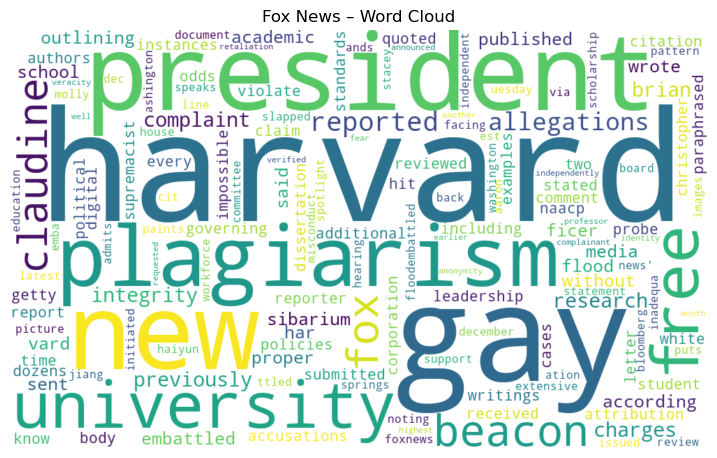

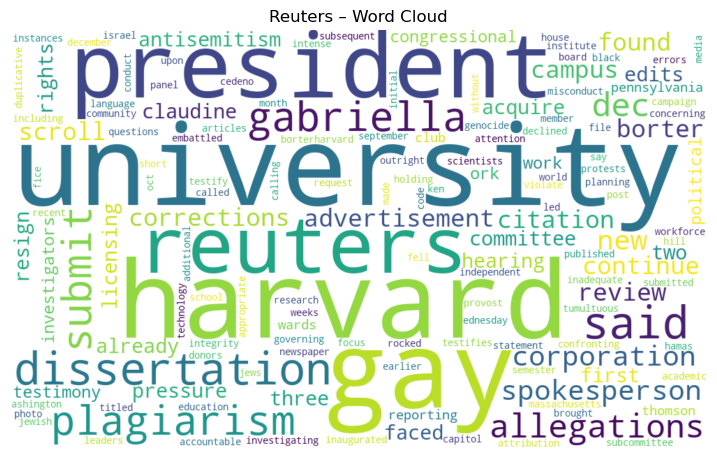

In [10]:
stop_words = set(stopwords.words("english"))

def make_wordcloud(text, title):
    tokens = re.findall(r"[A-Za-z']+", text.lower())
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    text_wc = " ".join(tokens)

    wc = WordCloud(width=1000, height=600, background_color="white",
                   max_words=150, collocations=False).generate(text_wc)
    plt.figure(figsize=(9,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

make_wordcloud(txt_fox, "Fox News – Word Cloud")
make_wordcloud(txt_reu, "Reuters – Word Cloud")


 **Fox News** emphasizes emotionally charged nouns (“charges,” “plagiarism,” “university”).  
- **Reuters** highlights institutional and procedural terms (“dissertation,” “edits,” “submit”).  
The frequency patterns reinforce each outlet’s tone.

Conclusions

**Sentiment Analysis:**  
Fox News → more negative; Reuters → neutral to slightly positive.   
This matches the editorial tone of each outlet.

**Headline Comparison:**  
Fox headline = strongly negative framing.  
Reuters headline = neutral, procedural.

**Readability:**  
Fox News ≈ high-school level (grade 9-10).  
Reuters ≈ college level (grade 12-13).  
Thus Reuters targets a more specialized audience.

**Word Clouds:**  
Fox → focus on controversy and accusation.  
Reuters → focus on process and resolution.

--Overall-- 
- **Fox News:** Accessible and dramatic for general audience.  
- **Reuters:** Formal and objective for information-driven readers.
